In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up the planet and atmosphere model.
planet5=Planet("SATURN")
planet5.h_skip = 1000E3
planet5.h_trap =  0.0E3
planet5.loadAtmosphereModel('../atmdata/saturn-nominal.dat', 0 , 1 , 2, 3, heightInKmFlag=True)

In [3]:
vehicle11=Vehicle('Galileo', 1000, 267, 0.0, np.pi*1.26**2.0*0.25, 0.0, 0.22, planet5)
vehicle11.setInitialState(1000,0.0,0.0,36,0.0,-12,0.0,0.0)
vehicle11.setSolverParams(1E-6)
vehicle11.propogateEntry (5*60, 0.1, 0.0)

In [4]:
vehicle12=Vehicle('Galileo', 1000, 267, 0.0, np.pi*1.26**2.0*0.25, 0.0, 0.22, planet5)
vehicle12.setInitialState(1000,0.0,0.0,36,0.0,-18,0.0,0.0)
vehicle12.setSolverParams(1E-6)
vehicle12.propogateEntry (4*60, 0.1, 0.0)

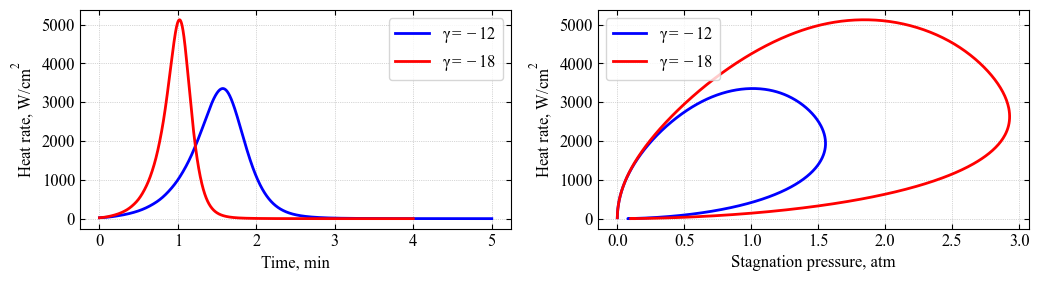

In [5]:
plt.figure(figsize=(12.25, 6.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle11.t_minc, 0.5*vehicle11.q_stag_total, 'b-', linewidth=2.0, label=r'$\gamma = -12$')
plt.plot(vehicle12.t_minc, 0.5*vehicle12.q_stag_total, 'r-', linewidth=2.0, label=r'$\gamma = -18$')
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(2, 2, 2)
plt.plot(vehicle11.stag_pres_atm, 0.5*vehicle11.q_stag_total, 'b-', linewidth=2.0, label=r'$\gamma = -12$')
plt.plot(vehicle12.stag_pres_atm, 0.5*vehicle12.q_stag_total, 'r-', linewidth=2.0, label=r'$\gamma = -18$')
plt.xlabel('Stagnation pressure, atm',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)

plt.savefig('../thermal-protection-systems-plots/saturn.png', dpi= 300, bbox_inches='tight')
plt.show()

In [6]:
from scipy import integrate

In [7]:
heatload_11 = integrate.cumtrapz(0.4*vehicle11.q_stag_total, vehicle11.t_minc*60, initial=0)/1e3
heatload_12 = integrate.cumtrapz(0.4*vehicle12.q_stag_total, vehicle12.t_minc*60, initial=0)/1e3

In [8]:
print(f'{round(heatload_11[-1], 2)} kJ/cm2')
print(f'{round(heatload_12[-1], 2)} kJ/cm2')

134.99 kJ/cm2
108.95 kJ/cm2
